# Collaborative Filtering


Dataset
*   
[Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data)

Evaluation_metrics
*   RMSE
*   MAE


# 1) Import Libraries

In [1]:
!pip install scikit-surprise --quiet

In [2]:
import numpy as np
import scipy
import pandas as pd
import math
import random
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import GridSearchCV
from scipy import spatial
from surprise import Dataset,Reader,KNNWithMeans,accuracy


# 2) EDA and Preprocessing

In [ ]:
books_df = pd.read_csv('Books.csv')
ratings_df= pd.read_csv('Ratings.csv')
users_df= pd.read_csv('Users.csv')

In [5]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
print(ratings_df['Book-Rating'].value_counts())

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64


In [7]:
book_user_rating = books_df.merge(ratings_df, left_on = 'ISBN',right_on = 'ISBN')
book_user_rating = book_user_rating[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
book_user_rating.reset_index(drop=True, inplace = True)

In [9]:
d ={}
for i,j in enumerate(book_user_rating.ISBN.unique()):
    d[j] =i
book_user_rating['unique_id_book'] = book_user_rating['ISBN'].map(d)

In [10]:
book_user_rating=book_user_rating[book_user_rating['Book-Rating']!=0]

In [11]:
book_user_rating.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,unique_id_book
1,0002005018,Clara Callan,Richard Bruce Wright,8,5,1
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8,1
5,0002005018,Clara Callan,Richard Bruce Wright,67544,8,1
8,0002005018,Clara Callan,Richard Bruce Wright,116866,9,1
9,0002005018,Clara Callan,Richard Bruce Wright,123629,9,1


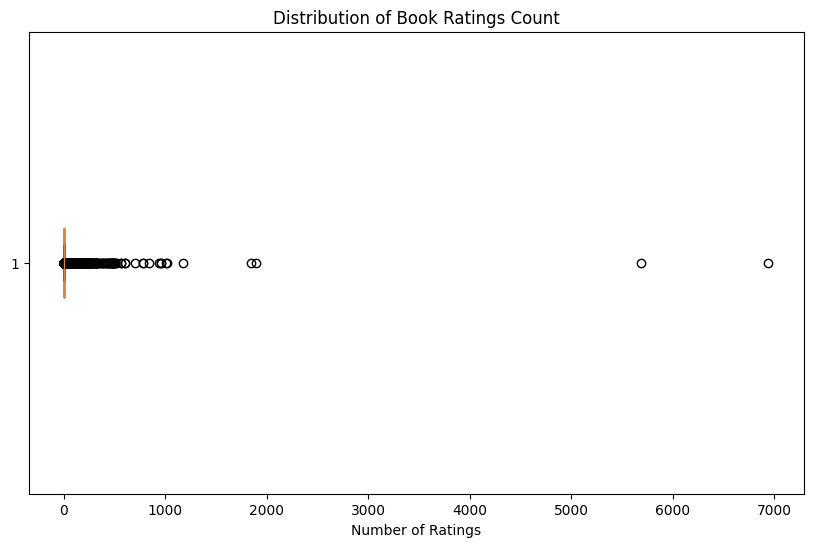

In [12]:
user_ratings_count = book_user_rating['User-ID'].value_counts()
plt.figure(figsize=(10, 6))
plt.boxplot(user_ratings_count, vert=False)
plt.title('Distribution of Book Ratings Count')
plt.xlabel('Number of Ratings')
plt.show()

In [13]:
# Define the upper and lower bounds for outliers
q1 = user_ratings_count.quantile(0.25)
q3 = user_ratings_count.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
filtered_ratings = book_user_rating[book_user_rating['User-ID'].isin(user_ratings_count[(user_ratings_count >= lower_bound) & (user_ratings_count <= upper_bound)].index)]

# Print the filtered DataFrame
print("Filtered Ratings (excluding users identified as outliers):")
filtered_ratings.head()

# sample 40000
filtered_ratings=filtered_ratings.sample(40000)

Filtered Ratings (excluding users identified as outliers):


In [14]:
filtered_ratings_data= filtered_ratings[['User-ID', 'unique_id_book', 'Book-Rating']]


In [15]:
reader = Reader(line_format = 'user item rating', rating_scale=(1,10))
data = Dataset.load_from_df(filtered_ratings_data [['User-ID', 'unique_id_book', 'Book-Rating']], reader)

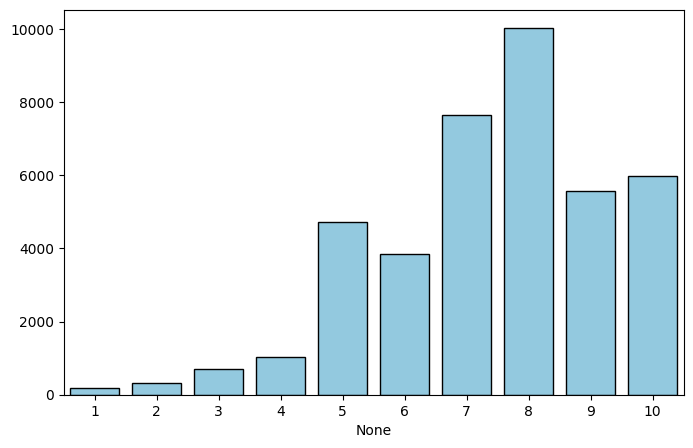

In [16]:
plt.figure(figsize=(8, 5))

rating_counts=filtered_ratings_data['Book-Rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index,y=rating_counts.values,color='skyblue', edgecolor='black')

plt.show()


# 3) Model Training

In [17]:
# Hyperparameter tuning with cross-validation
param_grid = {'k': [5, 10, 15], 'sim_options': {'name': ['cosine', 'msd','pearson']}}

grid_search = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
grid_search.fit(data)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [18]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
print(grid_search.best_score['rmse'])
print(grid_search.best_params['rmse'])
print(grid_search.best_score['mae'])

bestk= grid_search.best_params['rmse']['k']

sim_options= grid_search.best_params['rmse']['sim_options']


1.9103099767086422
{'k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}}
1.5136034205729167


In [20]:
model = KNNWithMeans(k=bestk, sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


# 4) Results

In [92]:
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.9142
MAE:  1.5180


In [99]:
df_prediction = pd.DataFrame(predictions, columns=['User-ID', 'Book-ID', 'Rating', 'Pred_rating', 'Details'])
df_prediction['Pred_rating'] = df_prediction['Pred_rating'].round()
df_prediction.drop(['Details'], axis=1, inplace=True)
df_prediction.head()

,User-ID,Book-ID,Rating,Pred_rating
0,55448,105212,10.0,7.0
1,229184,6943,10.0,7.0
2,92393,2324,7.0,7.0
3,202602,79565,7.0,7.0
4,251519,8897,7.0,5.0


Top 10 read books actual rating vs predicted rating

In [101]:
# Calculate the frequency of each ISBN
isbn_counts = df_prediction['Book-ID'].value_counts()

# Select the top 10 most frequently rated books
top_10_books = isbn_counts.head(10).index

In [95]:
top_10_books

Int64Index([26, 408, 1105, 5657, 4425, 305, 90, 748, 107, 118], dtype='int64')

In [103]:
filtered_df = df_prediction[df_prediction['Book-ID'].isin(top_10_books)]

In [104]:
grouped_df=filtered_df.groupby('Book-ID').mean().reset_index()
grouped_df['Rating'] = grouped_df['Rating'].round().astype(int)
grouped_df['Pred_rating'] = grouped_df['Pred_rating'].round().astype(int)

grouped_df.drop(['User-ID'], axis=1, inplace=True)

In [106]:
grouped_df.head()

,Book-ID,Rating,Pred_rating
0,26,5,7
1,90,7,7
2,107,8,8
3,118,9,8
4,305,7,7


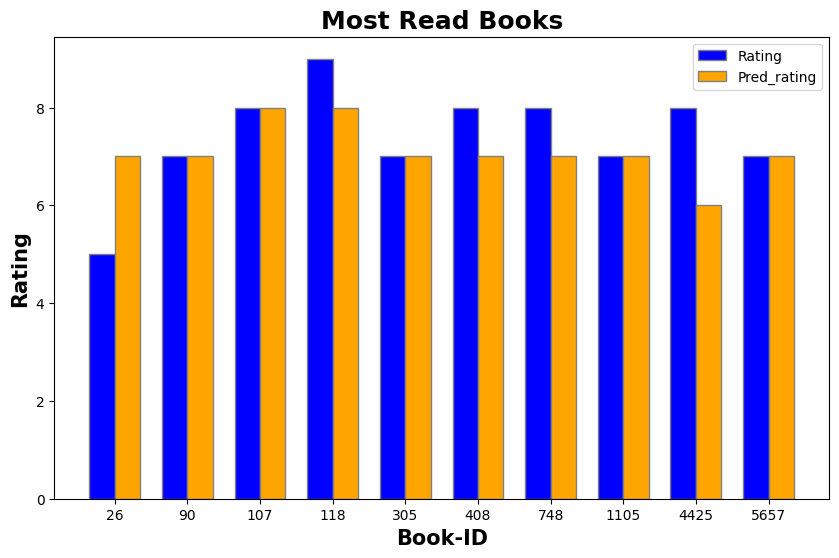

In [110]:
# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
r1 = range(len(grouped_df))

plt.bar(r1, grouped_df['Rating'], color='blue', width=bar_width, edgecolor='grey', label='Rating')
plt.bar([x + bar_width for x in r1], grouped_df['Pred_rating'], color='orange', width=bar_width, edgecolor='grey', label='Pred_rating')

# Adding labels
plt.xlabel('Book-ID', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in r1], grouped_df['Book-ID'])
plt.ylabel('Rating', fontweight='bold', fontsize=15)
plt.title('Most Read Books', fontweight='bold', fontsize=18)
plt.legend()

# Show the plot
plt.show()